# Feature Selection
Generated features and labels from the cleaned data. The data should be ready to use to train an ML model.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib.lines import Line2D
import joblib

from src.data.labels_util import load_labels, LabelCol, get_labels_file, load_clean_labels, get_workouts
from src.data.imu_util import (
    get_sensor_file, ImuCol, load_imu_data, Sensor, fix_epoch, resample_uniformly, time_to_row_range, get_data_chunk,
    normalize_with_bounds, data_to_features, list_imu_abspaths, clean_imu_data
)
from src.data.util import find_nearest, find_nearest_index, shift, low_pass_filter, add_col
from src.data.workout import Activity, Workout
from src.data.data import DataState
from src.data.build_features import main as build_features
from src.data.features_util import list_test_files
from src.config import (
    TRAIN_POLE_DIR, TRAIN_BOOT_DIR, TRAIN_FEATURES_FILENAME, TRAIN_LABELS_FILENAME
)
from src.visualization.visualize import multiplot

# import data types
from pandas import DataFrame
from numpy import ndarray
from typing import List, Tuple, Optional

## Generate Features
Create ML model's input dataset using the cleaned IMU data. Also create the labels to the input dataset. Separate these into training and testing datasets.

In [2]:
build_features()

Pole
Generating features and labels for workout in sensor 10L
Generating features and labels for workout in sensor 11L
Generating features and labels for workout in sensor 12L
Generating features and labels for workout in sensor 12L
Generating features and labels for workout in sensor 14L
Generating features and labels for workout in sensor 14R
Generating features and labels for workout in sensor 14R
Generating features and labels for workout in sensor 15L
Generating features and labels for workout in sensor 15R
Generating features and labels for workout in sensor 15R
Generating features and labels for workout in sensor 16L
Generating features and labels for workout in sensor 17R
Generating features and labels for workout in sensor 17R
Generating features and labels for workout in sensor 18L
Generating features and labels for workout in sensor 19L
Generating features and labels for workout in sensor 19R
Generating features and labels for workout in sensor 19R
Generating features and la

## Examine Feature and Label Integrity

<IPython.core.display.Javascript object>


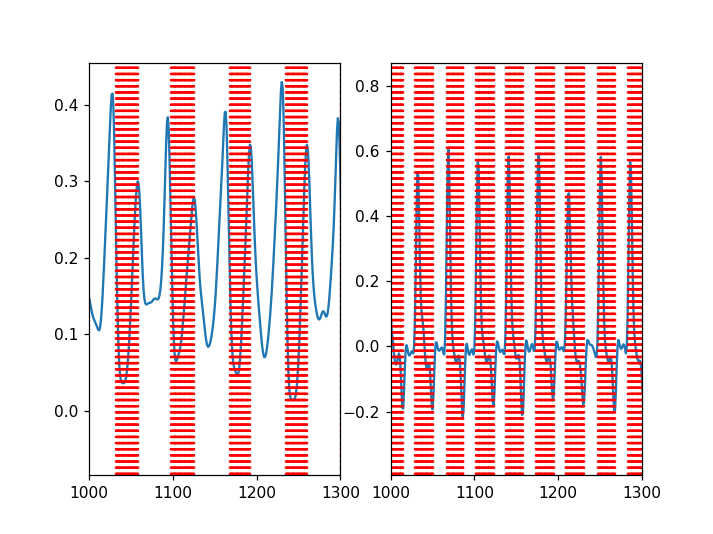

In [6]:
def plot_helper(idx, plot):
    # Plot Boot
    if idx == 0:
        features_file, labels_file = list_test_files(Activity.Boot)[1]
        features: ndarray = np.load(features_file)
        labels: ndarray = np.load(labels_file)
        
        # Plot x-axis acceleration
        plot.plot(features[:,0])

        # Plot labels
        for i in range(labels.shape[0]):
            if labels[i] == 1:
                plot.axvline(x=i, color='red', linestyle='dotted')
        plot.set_xlim([1000, 1300]) # Zoom (REMOVE to see the entire graph)
    # Plot Pole
    else:
        features_file, labels_file = list_test_files(Activity.Pole)[1]
        features: ndarray = np.load(features_file)
        labels: ndarray = np.load(labels_file)
        
        # Plot x-axis acceleration
        plot.plot(features[:,0])

        # Plot labels
        for i in range(labels.shape[0]):
            if labels[i] == 1:
                plot.axvline(x=i, color='red', linestyle='dotted')
        plot.set_xlim([1000, 1300]) # Zoom (REMOVE to see the entire graph)

multiplot(2, plot_helper)